In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import plotly.express as px

# Load the data
df = pd.read_csv(r"C:\Users\S221032134\Documents\loanprediction.csv")
print(df.head())  # Displaying first few rows to check

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [42]:
# Drop 'Loan_ID' column
df = df.drop('Loan_ID', axis=1)

# Check for missing values
print(df.isnull().sum())  # Check the missing values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [46]:
# data has missing values in some of the categorical columns and some numerical columns.Let’s have a look at the descriptive statistics of the dataset before filling in the missing values
#print(df.describe())




In [76]:
# Fill missing values for categorical columns with mode (most frequent)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Fill missing values in numerical columns with median or mode
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

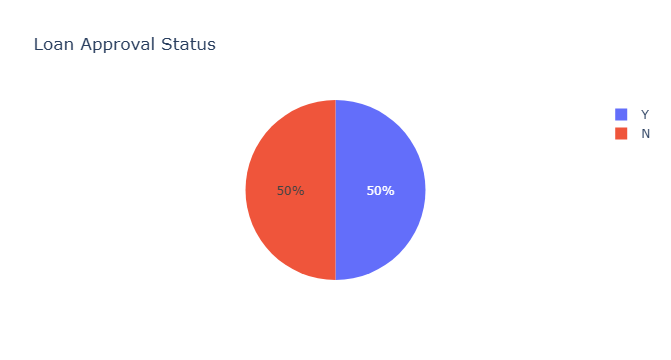

In [60]:
import plotly.express as px

loan_status_count = df['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, 
                         names=loan_status_count.index, 
                         title='Loan Approval Status')
fig_loan_status.show()

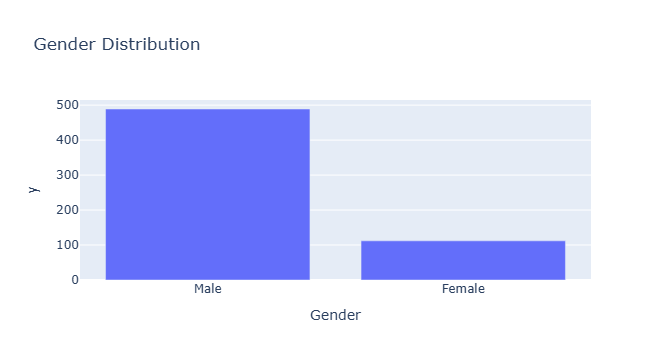

In [9]:
gender_count = df['Gender'].value_counts()
fig_gender = px.bar(gender_count, 
                    x=gender_count.index, 
                    y=gender_count.values, 
                    title='Gender Distribution')
fig_gender.show()

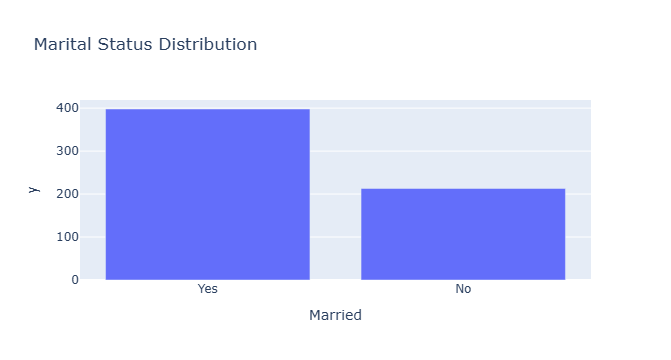

In [11]:
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count, 
                     x=married_count.index, 
                     y=married_count.values, 
                     title='Marital Status Distribution')
fig_married.show()

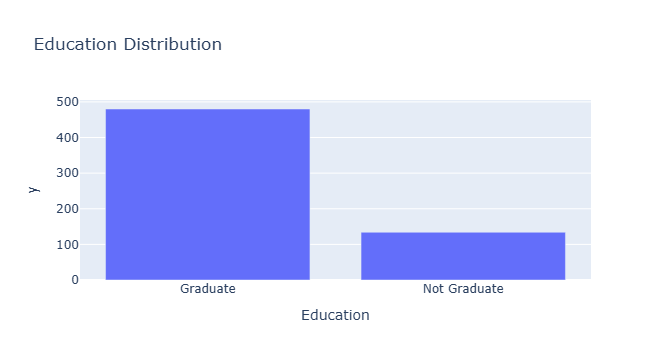

In [13]:
education_count = df['Education'].value_counts()
fig_education = px.bar(education_count, 
                       x=education_count.index, 
                       y=education_count.values, 
                       title='Education Distribution')
fig_education.show()

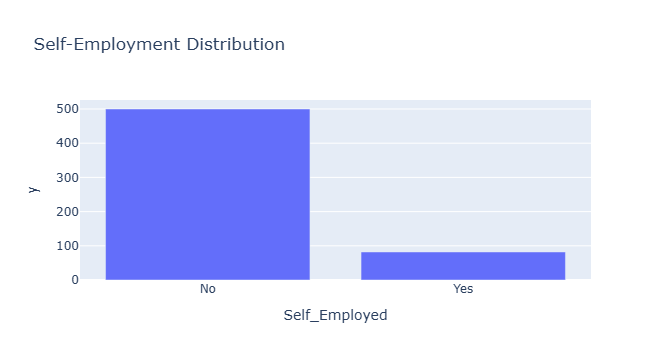

In [15]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, 
                           x=self_employed_count.index, 
                           y=self_employed_count.values, 
                           title='Self-Employment Distribution')
fig_self_employed.show()

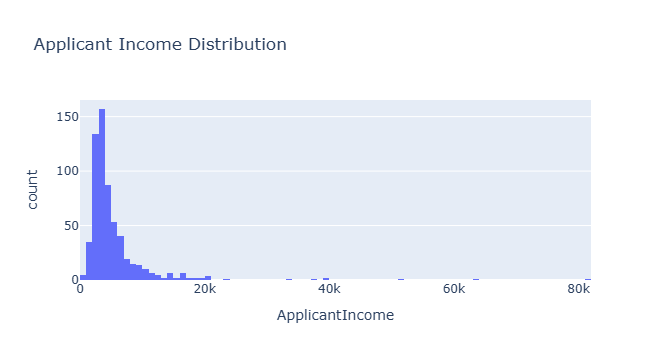

In [17]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome', 
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

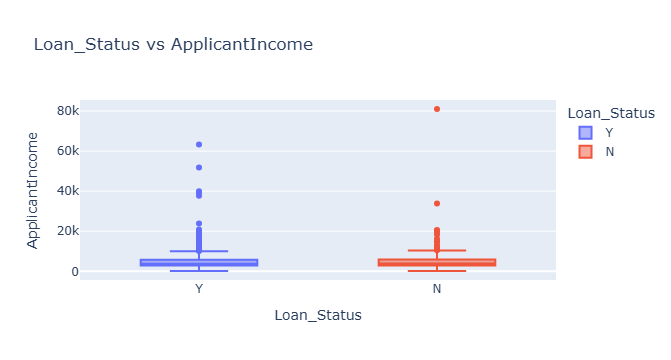

In [19]:
fig_income = px.box(df, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [62]:
# Remove outliers in the 'ApplicantIncome' and 'CoapplicantIncome' columns using IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
df = remove_outliers(df, 'ApplicantIncome')
df = remove_outliers(df, 'CoapplicantIncome')



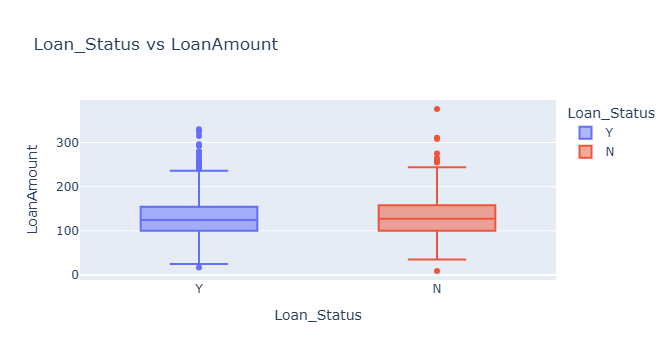

In [64]:
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

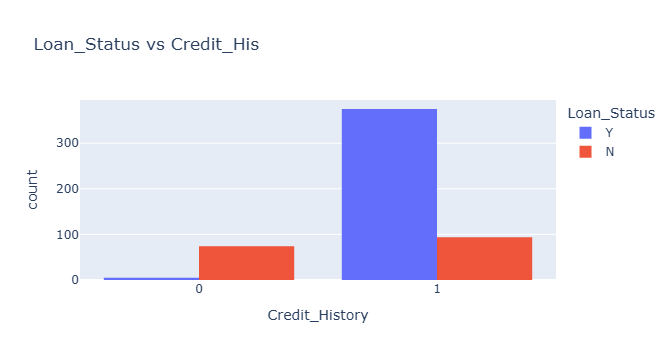

In [68]:
fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status', 
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

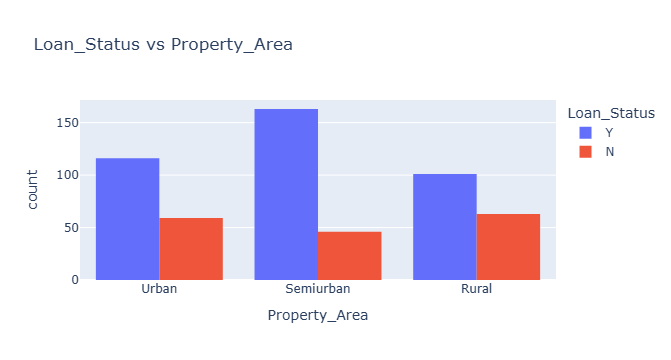

In [70]:
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

In [80]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols)

# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Use loc to avoid SettingWithCopyWarning
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize the SVM model
model = SVC(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the predicted values (optional: you can also print the accuracy)
print("Predictions: ", y_pred)

# Optionally, print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Predictions:  ['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']
Accuracy: 0.83


In [94]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
# Replace 'Y' with 1 and 'N' with 0 in the 'Loan_Status_Predicted' column
X_test_df['Loan_Status_Predicted'] = X_test_df['Loan_Status_Predicted']

print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
277        -0.544528          -0.037922   -0.983772          0.305159   
84         -0.067325          -0.931554   -1.571353         -1.430680   
275        -0.734870           0.334654   -0.298262          0.305159   
392        -0.824919           0.522317   -0.200332          0.305159   
537        -0.267373          -0.931554   -0.454950          0.305159   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
277        0.402248          False         True       False         True   
84         0.402248          False         True       False         True   
275        0.402248          False         True       False         True   
392        0.402248          False         True       False         True   
537        0.402248          False         True        True        False   

     Dependents_0  ...  Dependents_2  Dependents_3+  Education_Graduate  \
277          True  ...       